In [1]:
import mailbox

In [2]:
mboxfile = './Takeout/Mail/All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(mboxfile)

In [3]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
Received
Received
Content-Type
Date
From
Mime-Version
To
Message-ID
Subject
X-Drip-SendingAccount
X-SG-EID
X-SG-ID
X-Feedback-ID


In [4]:
# creating a csv file with only required parameters
import csv
with open('mailbox_limited.csv', 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [5]:
# reading the csv we created
import pandas as pd
dfs = pd.read_csv('mailbox_limited.csv', names=['subject','from','date','to','label','thread'])
dfs.head()

,subject,from,date,to,label,thread
0,subject,from,date,to,label,thread
1,What Pythonistas can learn from bestselling ho...,"""Dan at Real Python"" <info@realpython.com>","Sun, 31 May 2020 05:30:00 +0000 (UTC)",rnforusbaby1304@gmail.com,"Inbox,Category Updates,Unread",1668182710182532894
2,New Python tutorials on Real Python,"""Dan at Real Python"" <info@realpython.com>","Sat, 23 May 2020 14:32:00 +0000 (UTC)",rnforusbaby1304@gmail.com,"Inbox,Category Updates,Unread",1667492144845851128
3,Your question of the week from Vocabulary.com,"""Vocabulary.com"" <updates@vocabulary.com>","Sat, 23 May 2020 07:21:55 -0400 (EDT)",rnforusbaby1304@gmail.com,"Inbox,Category Promotions,Unread",1667484397189775368
4,=?UTF-8?q?`I_don't_go_to_the_stores_anymore._T...,Wish <offers@wish.com>,"Mon, 25 May 2020 22:45:29 -0700","""rishi nigam"" <rnforusbaby1304@gmail.com>","Inbox,Category Promotions,Unread",1667730695268998914


In [6]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [7]:
dfs['date'] = dfs['date'].apply(lambda y: pd.to_datetime(y, errors='coerce', utc=True))

In [8]:
dfs['date'].head()

0                         NaT
1   2020-05-31 05:30:00+00:00
2   2020-05-23 14:32:00+00:00
3   2020-05-23 11:21:55+00:00
4   2020-05-26 05:45:29+00:00
Name: date, dtype: datetime64[ns, UTC]

In [9]:
# printing the number of rows
len(dfs['date'])

19433

In [10]:
# removing the NaN values from the date field
dfs = dfs[dfs['date'].notna()]

In [11]:
# writing to a new file the changed dfs
dfs.to_csv('gmail.csv')

In [12]:
# getting the info about the new dfs
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8301 entries, 1 to 19432
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  8293 non-null   object             
 1   from     8301 non-null   object             
 2   date     8301 non-null   datetime64[ns, UTC]
 3   to       8284 non-null   object             
 4   label    8301 non-null   object             
 5   thread   8301 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 454.0+ KB


In [13]:
# checking the number of columns
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [14]:
# writing a function to take out email from the string
import re
import numpy as np
def extract_email(string):
    email = re.findall(r'<(.+?)?', string) # regular expression to find all email
    if not email:
        email = list(filter(lambda x: '@' in x, string.split()))
    return email[0] if email else np.nan # if email is found, return the email. else return nan

In [15]:
# applying the extract_email to each element of the 'from' column and saving it back
dfs['from'] = dfs['from'].apply(lambda z: extract_email(z))

In [16]:
# refractror or restructure the label field 
# if the email is yours then it is in sent part ,otherwise it goes into the reciever(inbox) label
myemail = 'rnforusbaby1304@gmail.com'
dfs['label'] = dfs['from'].apply(lambda z: 'sent' if z==myemail else 'inbox')

In [17]:
# to is not usefull so lets drop it
dfs.drop(columns='to', inplace=True)

In [18]:
dfs.head(10)

,subject,from,date,label,thread
1,What Pythonistas can learn from bestselling ho...,i,2020-05-31 05:30:00+00:00,inbox,1668182710182532894
2,New Python tutorials on Real Python,i,2020-05-23 14:32:00+00:00,inbox,1667492144845851128
3,Your question of the week from Vocabulary.com,u,2020-05-23 11:21:55+00:00,inbox,1667484397189775368
4,=?UTF-8?q?`I_don't_go_to_the_stores_anymore._T...,o,2020-05-26 05:45:29+00:00,inbox,1667730695268998914
5,=?UTF-8?B?UmlzaGkgTmlnYW0sIEJlZ2luIFlvdXIgTW9u...,m,2020-06-02 11:32:30+00:00,inbox,1668387548453580278
6,"Last chance for up to 30% off Hermo, PrestoMal...",n,2020-05-26 04:25:19+00:00,inbox,1667725649923968058
7,Welcome to Samsung Rewards,samsungpay@samsung.com,2020-05-22 05:36:11+00:00,inbox,1667367721383931515
8,=?utf-8?q?Hey_KFC_Lover!_Presenting_our_New_Di...,m,2020-05-16 11:35:51+00:00,inbox,1666846767513078485
9,"Hi Rishi Nigam , your package is on its way",o,2020-06-02 03:58:53+00:00,inbox,1668358177716724603
10,Your Grab E-Receipt,n,2020-05-24 11:05:11+00:00,inbox,1667569614153243253


In [19]:
import datetime
import pytz
# refractorising the time 
def refractor_time(x):
    est = pytz.timezone('US/Eastern')
    return x.astimezone(est)

In [20]:
dfs['date'] = dfs['date'].apply(lambda x: refractor_time(x))

In [21]:
# convert the day of the week variable into the name of the day, as in, Saturday, Sunday, and so on.
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name)
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [22]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [23]:
# refactor the hour, the year integer, and the year fraction, respectively. 
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [24]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [25]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [26]:
dfs.index = dfs['date']
del dfs['date']

In [27]:
#"How many emails did I send during a given timeframe?"
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Sun, 05 Jul 2009 09:33 PM
Wed, 03 Jun 2020 11:12 AM
inbox    8300
sent        1
Name: label, dtype: int64


In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# ticker module contains classes to support completely configurable tick locating and formatting.
# MaxNLocator finds up to a max number of intervals with ticks at nice locations.

In [29]:
# just a function to see how the plots will look
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [30]:
#Let's create two sub-dataframe—one for sent emails and another for received emails:

sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

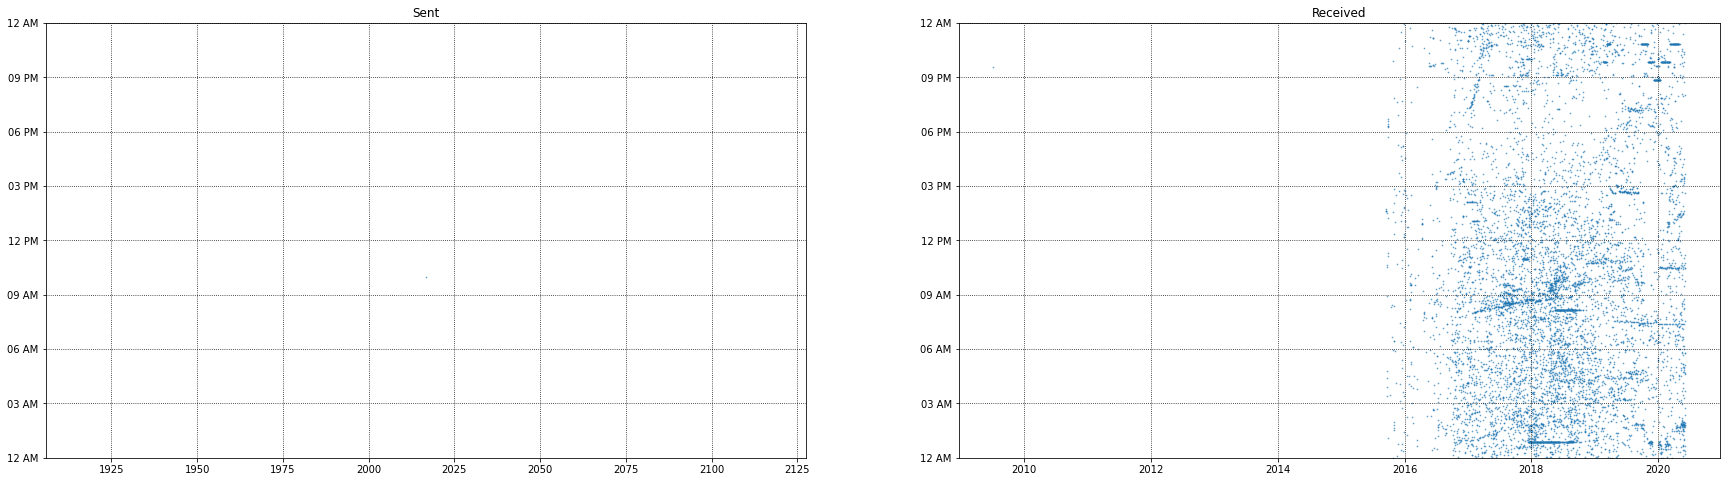

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

# Since the function is called twice, one with sent and other with recieved as datapoints, 2 plots will be made

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [32]:
# Function to plot a histogram for average emails per day
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [33]:
from scipy import ndimage

# Function to plot a histogram for average emails per hour
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);


In [34]:
# This class specifies the location of each plot
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

<ipython-input-33-25cc64d57994>:13: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)


ValueError: `bins` must be positive, when an integer

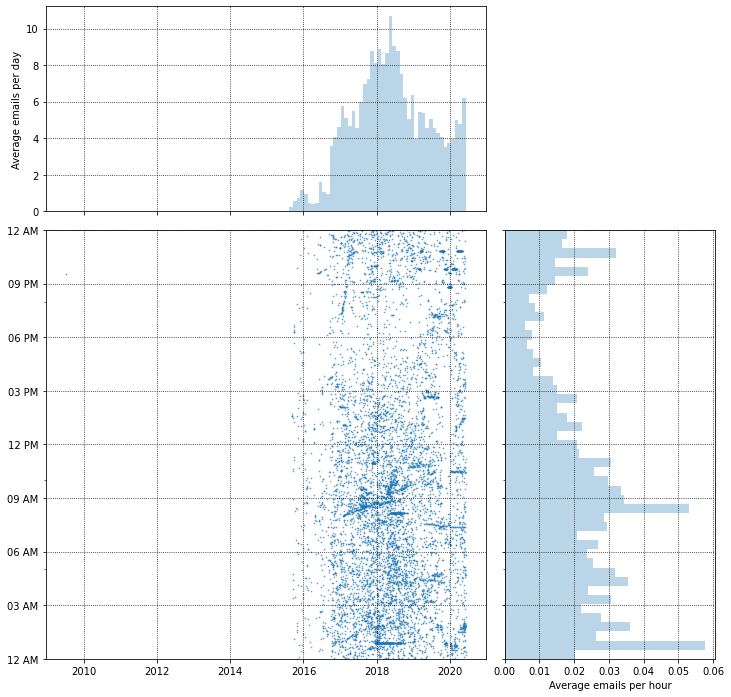

In [35]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
# Specifying the figure size and calling the function to plot the graphs
plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.3)
tpl.plot(sent, color='C1', alpha=0.9)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.3)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.9)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=36, shadow=True);

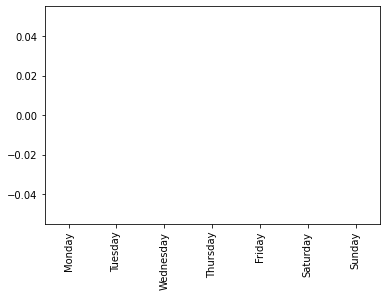

In [36]:
# Counting the no. of emails received each day of the week and plotting a bar chart
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [37]:
# Finding out who sends me the most emails

addrs = received['from'].value_counts()

addrs[0:10]

n    3540
i     616
s     587
d     587
m     522
a     488
b     331
o     309
r     197
u     190
Name: from, dtype: int64

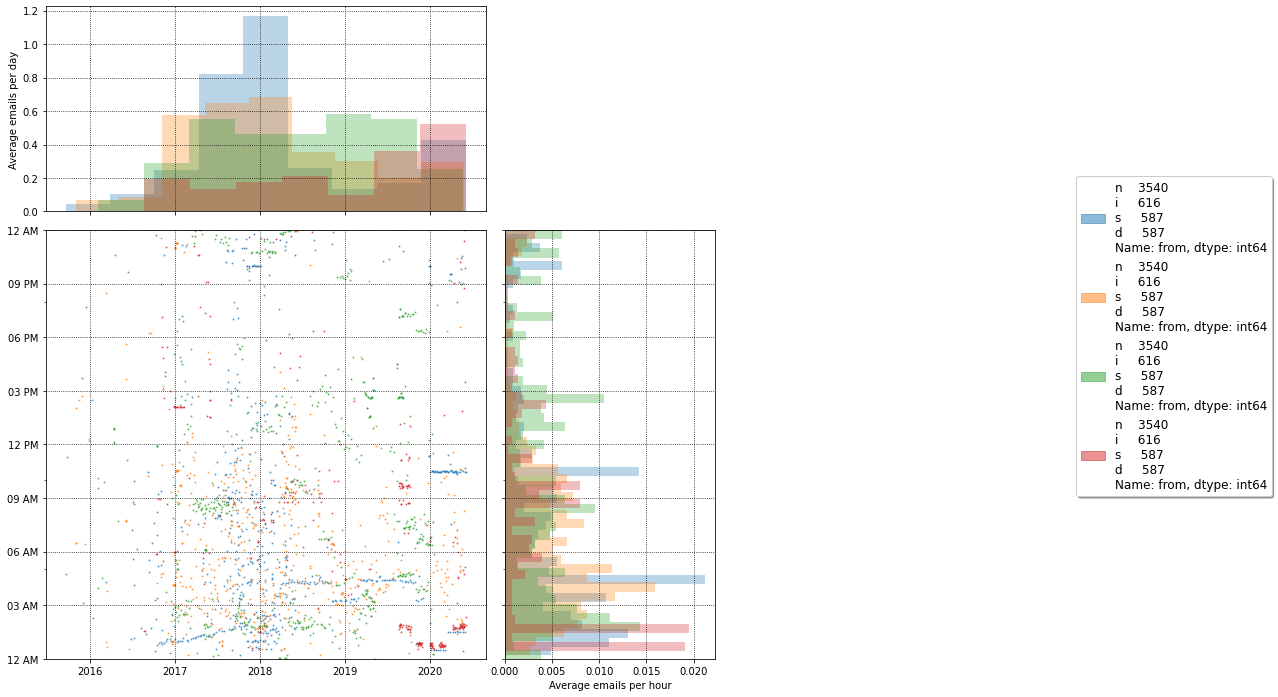

In [38]:
# Plotting the above inferences in a Triple Plot
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[2.8, 0.2], fontsize=12, shadow=True);

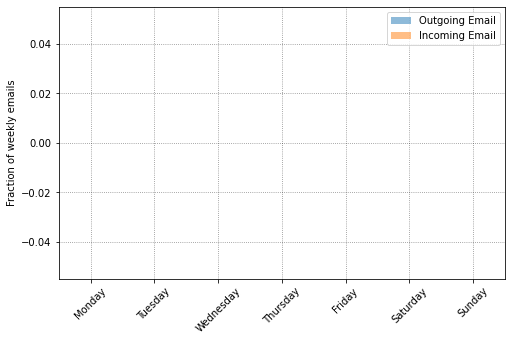

In [39]:
# Plotting bar chart with multiple values

sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

ValueError: zero-size array to reduction operation maximum which has no identity

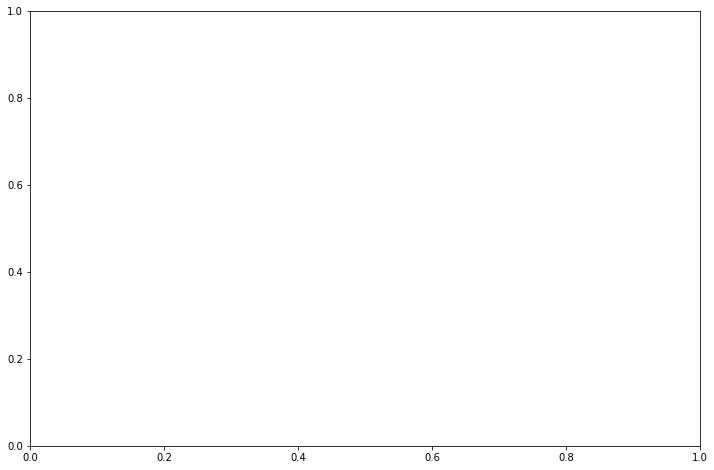

In [40]:
import scipy.ndimage
from scipy.interpolate import interp1d
# Using the previously defined plot_number_perdhour_per_year function to find most active time of day

plt.figure(figsize=(12,8))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(bbox_to_anchor=[1.8, 0.2], fontsize=12, shadow=True)

In [42]:
from wordcloud import WordCloud 

text = ' '.join(map(str, dfs['subject'].values))

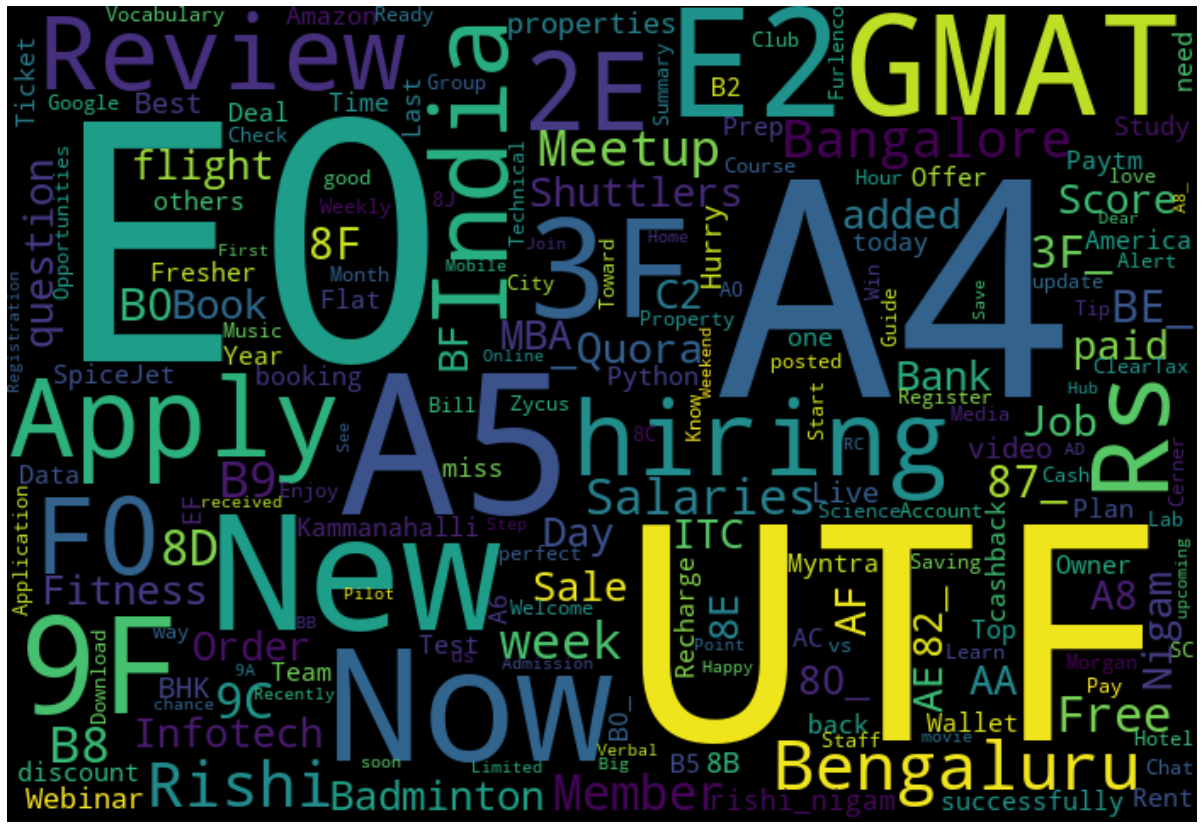

In [43]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)